In [34]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

In [35]:
df.train = tbl_df(read.csv("../../data/train.csv", stringsAsFactors = FALSE))
df.test = tbl_df(read.csv("../../data/test.csv", stringsAsFactors = FALSE))
df.combined = rbind(within(df.train, rm('Id','SalePrice')), within(df.test, rm('Id')))

In [36]:
# a lot of missing values for LotFrontage
df.combined %>% select(LotFrontage) %>% filter(is.na(LotFrontage)) %>% summarise(missing.lotFrontage.count=n())

,missing.lotFrontage.count
1,486


In [37]:
df.lot.frontage.numeric = df.combined %>% select_if(is.numeric)

dim(df.lot.frontage.numeric)
dim(df.combined)

[1] 2919   36

[1] 2919   79

In [38]:
col_names = names(df.lot.frontage.numeric)
col_names

[1] "MSSubClass"    "LotFrontage"   "LotArea"       "OverallQual"  
 [5] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "MasVnrArea"   
 [9] "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"  
[13] "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"    
[17] "BsmtFullBath"  "BsmtHalfBath"  "FullBath"      "HalfBath"     
[21] "BedroomAbvGr"  "KitchenAbvGr"  "TotRmsAbvGrd"  "Fireplaces"   
[25] "GarageYrBlt"   "GarageCars"    "GarageArea"    "WoodDeckSF"   
[29] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[33] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"

In [41]:
d= melt(
        df.lot.frontage.numeric %>% summarise_each(funs(n_distinct)), 
        id.vars=c()
    ) %>% arrange(value) %>% filter(value > 120)

d

real_numeric_col_names = as.character(d$variable)
real_numeric_col_names

,variable,value
1,ScreenPorch,121
2,LotFrontage,129
3,EnclosedPorch,183
4,OpenPorchSF,252
5,BsmtFinSF2,273
6,WoodDeckSF,379
7,MasVnrArea,445
8,GarageArea,604
9,X2ndFlrSF,635
10,BsmtFinSF1,992


[1] "ScreenPorch"   "LotFrontage"   "EnclosedPorch" "OpenPorchSF"  
 [5] "BsmtFinSF2"    "WoodDeckSF"    "MasVnrArea"    "GarageArea"   
 [9] "X2ndFlrSF"     "BsmtFinSF1"    "TotalBsmtSF"   "X1stFlrSF"    
[13] "BsmtUnfSF"     "GrLivArea"     "LotArea"

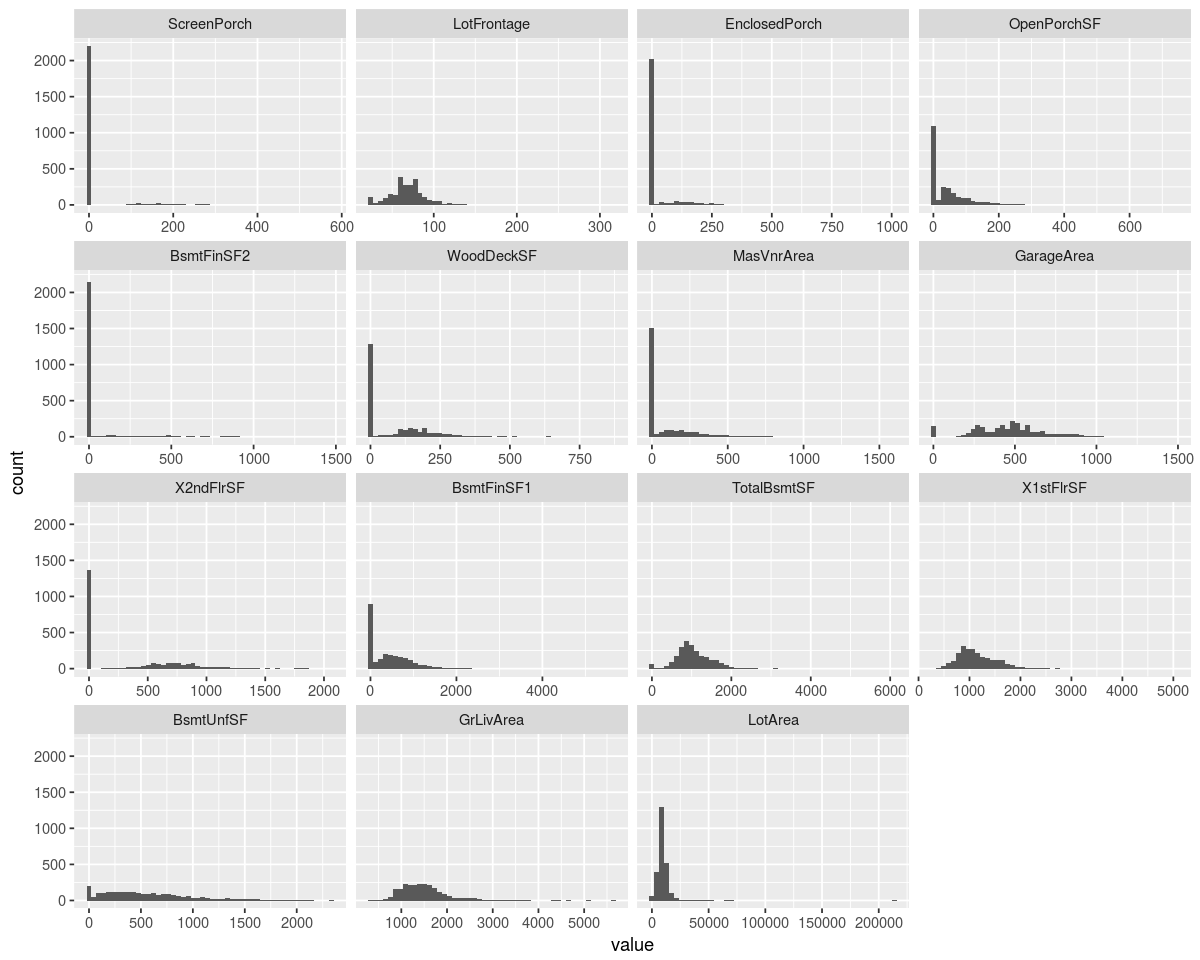

In [30]:
d = df.lot.frontage.numeric %>% select_(.dots = real_numeric_col_names) %>% na.omit()
d = melt(d, id.vars=c())

options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(d, aes(x = value)) + 
    facet_wrap(~variable, scales = "free_x") + 
    geom_histogram(bins = 50 )

In [ ]:
d = melt(df.lot.frontage.numeric %>% select_(.dots = real_numeric_col_names), id.vars=c())

In [8]:
df.lot.frontage.numeric.real = df.lot.frontage.numeric %>% select_(.dots = real_numeric_col_names)